In [3]:
%cd ~/Documents/SOMBL/

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scripts import plot_utils as putils 

/home/aditya/Documents/SOMBL


This notebook is for generating plots for the presentation.

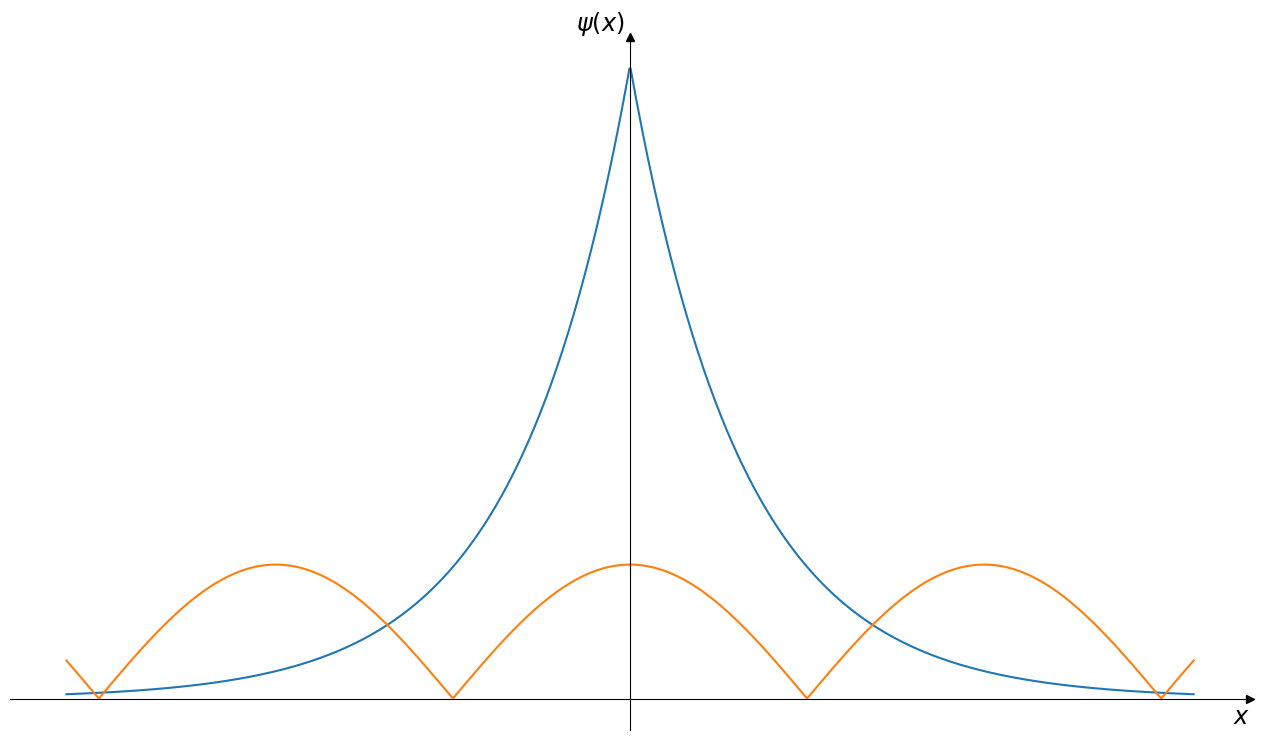

In [19]:
fig, ax = plt.subplots(figsize=(16, 9))

x = np.linspace(-5, 5, 1000)
yloc = np.exp(-np.abs(x)) / (1 - np.exp(-10))
yplane = np.abs(np.cos(x)) / (5 + 0.5*np.sin(10))


# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax.spines[["top", "right"]].set_visible(False)

# Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
# case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
# respectively) and the other one (1) is an axes coordinate (i.e., at the very
# right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
# actually spills out of the axes.
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off

ax.set_xlabel(r"$x$", loc="right", rotation="horizontal", fontsize="xx-large")
ax.set_ylabel(r"$\psi(x)$", loc="top", rotation="horizontal", fontsize="xx-large")

ax.plot(x, yloc)
ax.plot(x, yplane)
fig.savefig("plots/PDFs/exp_decay_example.pdf")
fig.savefig("plots/PNGs/exp_decay_example.png")

In [57]:
df = pd.read_csv("data/loc_len_vals_60percent.csv")
df

,Unnamed: 0,size,coupling,disorder,hopup,hopdn,runs,nospin,xi,residpp,cutoff,spin
0,0,40,0.0,8.0,1.0,1.0,100,False,18.005585,0.003575,17,upup
1,1,40,0.0,8.0,1.0,1.0,100,False,18.005585,0.003575,17,dndn
2,2,40,0.0,9.0,1.0,1.0,100,False,14.237419,0.004857,17,upup
3,3,40,0.0,9.0,1.0,1.0,100,False,14.237419,0.004857,17,dndn
4,4,40,0.0,10.0,1.0,1.0,100,False,11.519775,0.003830,17,upup
...,...,...,...,...,...,...,...,...,...,...,...,...
897,897,40,2.0,17.0,1.0,1.0,100,False,38.016989,0.002132,17,dndn
898,898,40,2.0,18.0,1.0,1.0,100,False,32.193911,0.002786,17,upup
899,899,40,2.0,18.0,1.0,1.0,100,False,32.196358,0.002780,16,updn
900,900,40,2.0,18.0,1.0,1.0,100,False,32.196358,0.002780,16,dnup


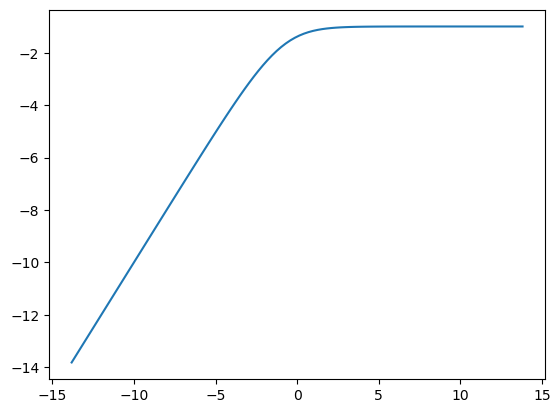

In [22]:
g = np.logspace(-6, 6, 100)
x = np.log(g)
y1d = -(1 + g) * np.log(1 + 1/g)
plt.plot(x, y1d, label="1D")

<AxesSubplot:xlabel='coupling', ylabel='xi'>

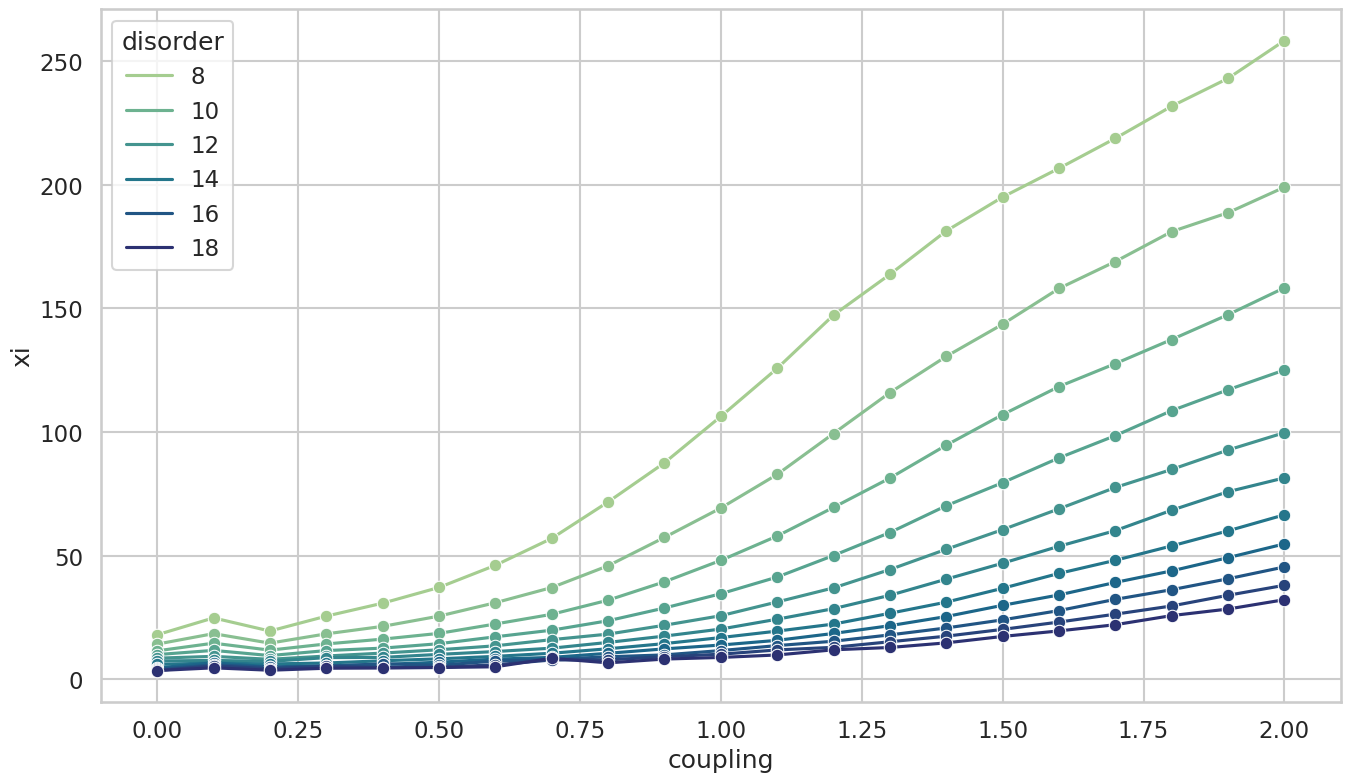

In [74]:
sns.set_context("talk")
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 9))
# data = df[df["disorder"] == 18]
# data = data.loc[data["spin"] == "upup"]
# ax.errorbar(data["coupling"], data["xi"], yerr=np.sqrt(data["residpp"]), marker="o", capsize=5)
# ax.set_ylim(0, 20)
sns.lineplot(data=df[df["spin"] == "upup"], x="coupling", y="xi", hue="disorder", marker="o", palette="crest")
# data